# Exercise 1


### Function Scripts 

1.     WarmUpExercise.m  
2.     plotData.m
3.     gradientDescent.m
4.     computeCost.m
5.     gradientDescentMulti.m
6.     computeCostMulti.m
7.     featureNormalize.m
8.     normalEqn.m


__Note:__ The way to write functions and scripts can be found [here](https://am111.readthedocs.io/en/latest/jmatlab_use.html)  
Essentially, need to add a line (below) at the beginning of the script:  

__%%file function_name.m__

Once the code (above) is executed, a new file is created in the same folder as the notebook 

In [56]:
%%file test.m
function A = test(n)
% testing writing functions
A = eye(n);
end

Created file 'C:\Users\Makana\Documents\MATLABfiles\machinelearn_NG\Matlab_track\test.m'.


In [55]:
% testing the function we just wrote

test(6)


ans =

     1     0     0     0     0     0
     0     1     0     0     0     0
     0     0     1     0     0     0
     0     0     0     1     0     0
     0     0     0     0     1     0
     0     0     0     0     0     1




--------------------------------------------------------------------------

### WarmUpexercise
Return a 5x5 identity matrix


In [1]:
A = eye(5)


A =

     1     0     0     0     0
     0     1     0     0     0
     0     0     1     0     0
     0     0     0     1     0
     0     0     0     0     1




## Linear regression with 1 variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.  
You would like to use this data to help you select which city to expand
to next.

In [69]:
% From plotData.m
% 
% Loading the data and find out how much data

data = load('.\ex1\ex1data1.txt'); % read comma separated data
X = data(:,1);
y = data(:,2);
m = length(y);                    % number of training examples

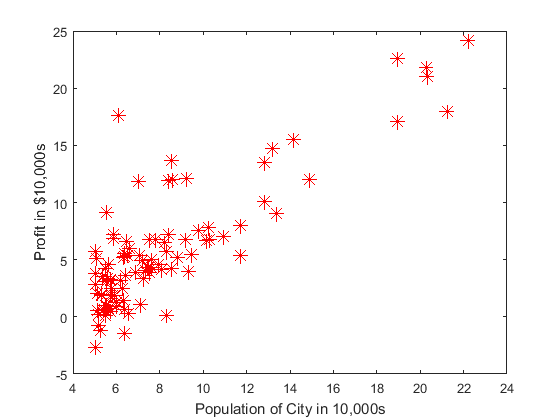

In [70]:
%  plotting the data
%plot inline
plot(X, y, 'r*','MarkerSize',10);        % Plot
ylabel('Profit in $10,000s');            % Set the y-axis
xlabel('Population of City in 10,000s')  % Set the x-axis


In [71]:
size(X)      % size is now is 97 rows x 1 col


ans =

    97     1




### Gradient Descent


We store each example as a row in the the X
matrix in Octave/MATLAB. To take into account the intercept term (\theta0),
we add an additional first column to X and set it to all ones. This allows
us to treat \theta0 as simply another _feature_.

In [72]:
% From ex1.m

% Add the additional column, \theta0, as another  'feature' 

X = [ones(m, 1), data(:,1)];   % Add a column of ones to x
theta = zeros(2, 1);           % initialize fitting parameters

                               % size(X) now is 97 rows x 2 columns
                               % size of theta now is 2 x 1 for theta 0 and theta1

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;


fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);  % computeCost is a function saved in the same folder
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');



ans =

    97     2


Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07



In [29]:
% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');



With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24



In [30]:
fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);


Running Gradient Descent ...



In [31]:
% print theta to screen

fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664




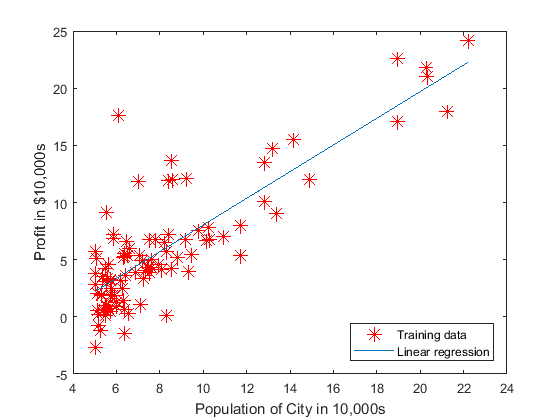

In [42]:
% Plotting the linear fit against the dataset 

% Plot dataset
plot(X(:,2), y, 'r*','MarkerSize',10);   % Plot
ylabel('Profit in $10,000s');            % Set the y-axis
xlabel('Population of City in 10,000s')  % Set the x-axis

% Plot the linear fit

hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression','Location','Southeast')
hold off % don't overlay any more plots on this figure


In [43]:
% Predict values for population sizes of 35,000 and 70,000

predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129



### Visualizing $J\theta

Visualizing J(theta_0, theta_1) ...



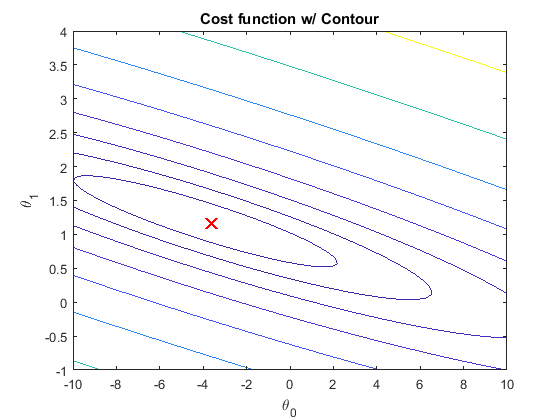

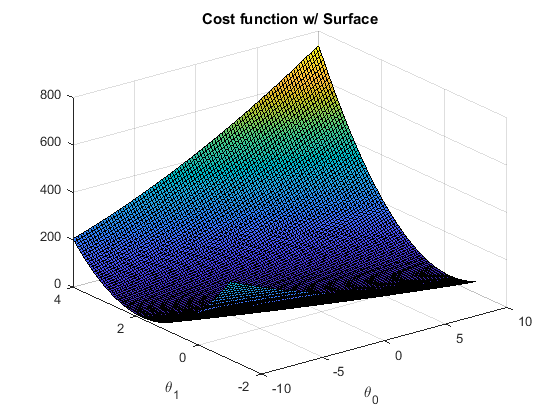

In [46]:
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
      t = [theta0_vals(i); theta1_vals(j)];
      J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');
title('Cost function w/ Surface');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
title('Cost function w/ Contour')

### Linear Regression with Multiple Variables  
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.  
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

### Feature Normalization 

In [60]:
%%file "featureNormalize.m"

function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));

for col = 1: size(X,2)
    mu(1,col) = mean(X(:,col));
    sigma(1,col) = std(X(:,col));
    X_norm(:,col) = (X(:,col) - mu(1,col)) / sigma(1,col); 
end

end

Created file 'C:\Users\Makana\Documents\MATLABfiles\machinelearn_NG\Matlab_track\featureNormalize.m'.


In [75]:
% Loading data

data = load('.\ex1\ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

In [79]:
% column 1 is size of house (in sq. ft)
% column 2 is number of bedrooms
% column 3 is price of house

X(1:5,:), y(1:5,:)


ans =

        2104           3
        1600           3
        2400           3
        1416           2
        3000           4


ans =

      399900
      329900
      369000
      232000
      539900




In [84]:
% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

fprintf('Program paused. Press enter to continue.\n');


% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];

X(1:5,:)


First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 
Program paused. Press enter to continue.
Normalizing Features ...

ans =

    1.0000    0.1300   -0.2237
    1.0000   -0.5042   -0.2237
    1.0000    0.5025   -0.2237
    1.0000   -0.7357   -1.5378
    1.0000    1.2575    1.0904




Running gradient descent ...
Theta computed from gradient descent: 
 334302.063993 
 100087.116006 
 3673.548451 




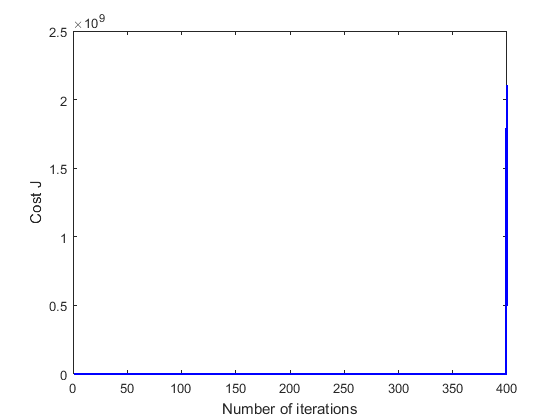

In [85]:
fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.01;
num_iters = 400;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');


In [86]:
% Estimate the price of a 1650 sq-ft, 3 br house

% the first column of X is all-ones. Thus, it doesnot need to be normalized
% 

% normalizing [1650 3]

est = [1650 3];
norm_est = est;

for col = 1: size(est,2)
    norm_est(:,col) = (est(:,col) - mu(1,col)) / sigma(1,col);
end

% Include 1 to first column
input_est = [1 norm_est(:,1) norm_est(:,2)];

price = input_est * theta;

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);



Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289314.620338
Program paused. Press enter to continue.



### Using __Gradient Descent__ algorithm  

Disdvantages 
1. Need to choose \alpha
2. Needs many iterations  

Advantage:
3. Works well even when n is large

### Using Normal equation to solve \theta analytically  
Advantages:
1. No need to choose \alpha
2. No need to iterate

Disadvantages:
3. Need to compute, (X^T X)^-1
    - Slow if n is very large
4. Effective to n = 10000

In [88]:
% Loading data
data = csvread('.\ex1\ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');


Theta computed from the normal equations: 
 89597.909544 
 139.210674 
 -8738.019113 




In [89]:
 
% Estimate the price of a 1650 sq-ft, 3 br house
%


est = [1 1650 3];

price = input_est * theta;

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);



Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $91490.957664

